## First Checkpoint



 ### Dataset Scraping
 
 For our project we decided to scrape data of european football transfermarket from the specialized site called Transfermakt. At first we thought to scrape data about last transfers, but at the end we decided to scrape multiple years in order to perform also time analysis, taking into consideration the pandemic effect.
 So, our dataset contains the top 625 transfers for player market value (assessed by transfermarkt) for years from 2018 to 2023.

This is a sample of our dataset:

In [118]:
import pandas as pd 

df=pd.read_csv('transfer_window.csv', sep=',')
df.head()

,Unnamed: 0,name,position,age,market_value,country_from,league_from,club_from,country_to,league_to,club_to,fee,year,General_Position
0,0,Kylian Mbappé,Centre-Forward,19,120000000,Monaco,Ligue 1,AS Monaco,France,Ligue 1,Paris Saint-Germain,180000000,2018,Attack
1,1,Cristiano Ronaldo,Centre-Forward,33,100000000,Spain,LaLiga,Real Madrid,Italy,Serie A,Juventus FC,117000000,2018,Attack
2,2,Kepa Arrizabalaga,Goalkeeper,23,20000000,Spain,LaLiga,Athletic Bilbao,England,Premier League,Chelsea FC,80000000,2018,Goalkeeper
3,3,Thomas Lemar,Attacking Midfield,22,65000000,Monaco,Ligue 1,AS Monaco,Spain,LaLiga,Atlético de Madrid,72000000,2018,Midfield
4,4,Riyad Mahrez,Right Winger,27,50000000,England,Premier League,Leicester City,England,Premier League,Manchester City,67000000,2018,Attack


### Dataset description



description

### Dataset Cleaning and preprocessing

We create other variables to group leagues different from the top 5 European Leagues (Bundesliga, Serie A, Premier League, LaLiga, Ligue 1) and to group the specific positions that we have into more general and easily understandable ones (goalkeeper, defense, midfield and attack). Then, for sake of simplicity, we omologate free and loan transfers by considering both of them as zero fee. 
The last thing we do is to convert the thousands symbol ('k') into '000'and dealing with very few missing values by making the fee equal to the market value.

### Exploratory Analysis and our story

The first thing we want to know is how much each different league has spent and earned from the transfermaket. So, our first visualization would be a barchart grouped by league. Since the two graphs are the same we would like to make it interactive with a radio button in order to choose between the two visualization.

In [46]:
# leagues with ascedning order of fee spent
league=df.groupby('league_to', as_index=False)['fee'].sum()
league=league.sort_values(by=['fee'], ascending=False)

import plotly.express as px
import plotly.graph_objects as go

color=["#031b5e",'#25AA0A', 'lightgrey', "#E16B19", '#7e33c5',"#ca0302" ]


fig = go.Figure(data= [go.Bar(x=league["league_to"], y=league["fee"], marker_color=color)])
fig.show()

In [56]:
import plotly.express as px

# leagues with ascedning order of fee spent
league_from=df.groupby('league_from', as_index=False)['fee'].sum()
league_from=league_from.sort_values(by=['fee'], ascending=False)

color2=['lightgrey','#25AA0A',"#031b5e", '#7e33c5', '#E16B19', "#ca0302" ]

fig = go.Figure(data= [go.Bar(x=league_from["league_from"], y=league["fee"], marker_color=color2)])
fig.show()

The next thing we want to visualize is the top 20 club for expenditures and we plot it together with their revenues

In [7]:
#data preparation club two sided barchart
in_transfer=df.groupby(by=["club_to"]).sum(['fee'])
in_transfer=in_transfer.rename(columns={"fee": "expenditure"})
in_transfer['id']=in_transfer.index

out_transfer=df.groupby(by=["club_from"]).sum(['fee'])
out_transfer['id']=out_transfer.index
out_transfer=out_transfer.rename(columns={"fee": "revenue"})

balance=out_transfer.merge(in_transfer, how='inner', on='id')
balance=balance.loc[:,['id', 'revenue','expenditure']]
balance['expenditure'] = balance['expenditure']*(-1)

balance=balance.sort_values(by=['expenditure'])
balance_20=balance.head(20)

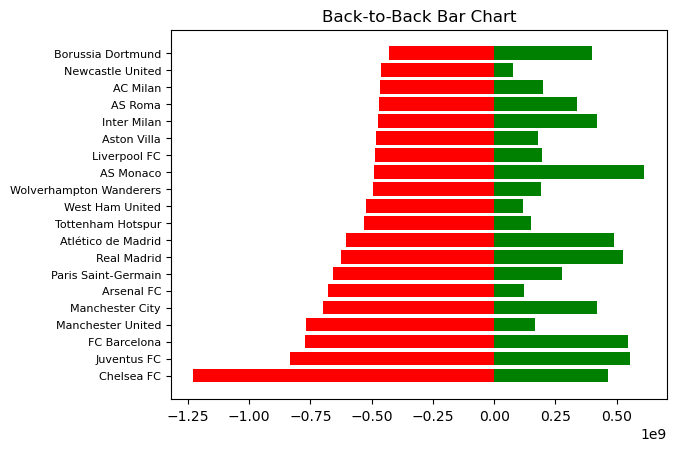

In [9]:
# plot the bars
import matplotlib.pyplot as plt

plt.barh(balance_20['id'], balance_20['revenue'], color = 'g')
plt.barh(balance_20['id'], balance_20['expenditure'], color = 'r')
plt.title("Back-to-Back Bar Chart")
plt.yticks(fontsize=8)
plt.show()

The last representation of this part concerns the top transfers for fee among these years plotted together with the respective 
league in a sankey diagram.


In [ ]:
# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [25]:
#taking top 30 fee
df_sorted=df.sort_values(by=['fee'], ascending=False)
df_top=df_sorted.head(30)

In [35]:
#create a color dictionary for both leagues and players making match the colors
league_color={
    "Bundesliga": "#ca0302",
    "LaLiga": "#E16B19",
    "Premier League": "#031b5e",
    "Serie A":'#25AA0A',
    'Ligue 1':'#7e33c5'
    }

for index,row in df_top.iterrows():
    league=row['league_to']
    color=league_color[league]
    key=row['name']
    league_color[key]=color

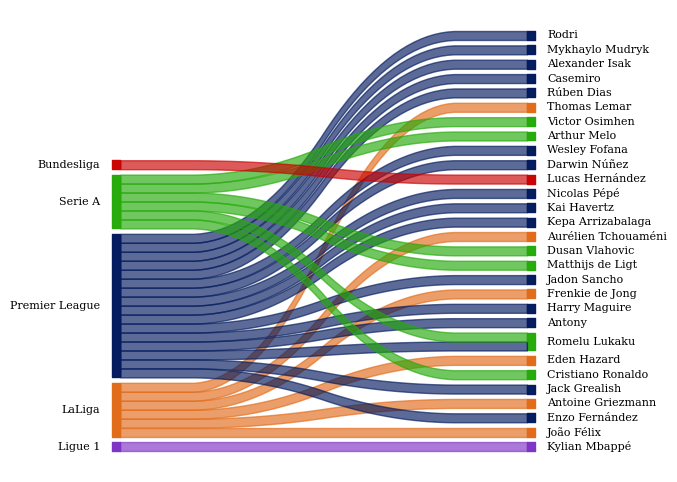

In [36]:
sankey(df_top['league_to'], df_top["name"], colorDict=league_color, fontsize=8)

### Insights from visualizations 

All these plots highlight one thing : the Premier League seems to be on another 'planet' with respect to the other leagues. The first two plots shows that Premier League is first in Europe for expenditures among all countries and second for revenues, 'just' around 400 Milions less than Serie A.
Twe two sided barchart highlights that Chelsea FC is by far the club which spend more. Furthermore, it is important to put in evidence that 9 out 20 are English teams. The scariest part is that clubs such as Aston Villa or West Ham have never been in the first 4 places of the league, but they can afford to spend more than Inter and AC Milan, that won last two Seria A championships. The last plot ( i.e., sankey diagram), shows, finally, that almost all the top 20 highest fee transfers where made by English team. Premier League is responsible for 16 out of 30 purchases, while the nearest leagues are Serie A and LaLiga with just 6.

The next two questions are:


1- Is this difference consisten whit the covid effect? 


2- Why Premier League is so special and differet?

### Covid Effect

In order to get covid drawbacks on the european market we decide to investigate two aspects: the first one is quite intuitive and 
and consists in looking at the total expenditures for league during the years, the second one regards the zero fee transfers. The 
pandemic had huge consequences in terms of revenue. The main one was probably the impossibility of earning from match tickets. Less 
resources imply the necessity to be 'creative' and to buy player at zero or with different formulas (i.e., loan). 

In [71]:
league_year=df.groupby(['league_to', 'year'], as_index=False)['fee'].sum()
premier=league_year[league_year['league_to']=="Premier League"]
serieA=league_year[league_year['league_to']=="Serie A"]
bundesliga=league_year[league_year['league_to']=="Bundesliga"]
laliga=league_year[league_year['league_to']=="LaLiga"]
ligue1=league_year[league_year['league_to']=="Ligue 1"]
others=league_year[league_year['league_to']=="Others"]






fig_stacked_bar = go.Figure(data= [go.Bar(name='Premier League',x=premier["year"], y=premier["fee"], marker_color='#031b5e'),
                      go.Bar(name='Serie A',x=serieA["year"], y=serieA["fee"], marker_color='#25AA0A'),
                      go.Bar(name='Bundesliga',x=bundesliga["year"], y=bundesliga["fee"], marker_color='#ca0302'),
                      go.Bar(name='LaLiga',x=laliga["year"], y=laliga["fee"], marker_color='#E16B19'),
                      go.Bar(name='Ligue 1',x=ligue1["year"], y=ligue1["fee"], marker_color='#7e33c5'),
                      go.Bar(name='Others',x=others["year"], y=others["fee"], marker_color='lightgrey')])

fig_stacked_bar.update_layout(barmode='stack')

In [76]:
fig_pie=px.pie(values=[760,2974], names=['zero', 'non-zero'], title='Percentage of zero transfers', color_discrete_map = 'viridis')

fig_pie.update_traces(hoverinfo = 'label+percent', textfont_size = 20,
                  textinfo = 'label+percent', pull = [0.1, 0, 0.2, 0, 0, 0])

The idea is to visualize these plots above one near each other, using brushing and linking. In that way, selecting year and league on the barchart, the piechart will show the corresponding proportion of zero transfers during the years. 

### Premier League interactions

In [101]:
import pycountry
d={}
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
for index,row in df.iterrows():
    country_to=row['country_to']
    code_to = countries.get(country_to ,'GBR')
    row['code_to']=code_to
    country_from=row['country_from']
    code_from = countries.get(country_from ,'GBR')
    row['code_from']=code_from
    d[index]=row
    
df=pd.DataFrame.from_dict(d, orient='index')
premier_league = df[df['league_to']=='Premier League']
color_map=df.groupby(['code_from'])['age'].count().reset_index(name="count")
color_map2=df.groupby(['code_from'])['fee'].sum().reset_index(name="fee")
color_map2['avg_fee']=color_map2['fee']/color_map['count']

In [100]:
fig = px.choropleth(color_map, locations="code_from",
                    color='count', 
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [107]:
internal_market=df[df['league_to']==df['league_from']]
internal_market=df[df['league_to']!='Others']
internal_market['delta']=internal_market['fee']-internal_market['market_value']

internal_market=internal_market.groupby(['league_from'])['delta'].mean().reset_index(name="total delta")

C:\Users\Matteo\AppData\Local\Temp\ipykernel_18376\3823158697.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,league_from,total delta
0,Bundesliga,-5.812188e+06
1,LaLiga,-7.040504e+06
2,Ligue 1,-2.639423e+06
3,Others,1.363636e+03
4,Premier League,-8.840755e+06
5,Serie A,-6.686493e+06


In [122]:
import networkx as nx

premier_league=df[df['league_to']=='Premier League']

G=nx.from_pandas_edgelist(premier_league, source='club_from', target='club_to', edge_attr='fee')

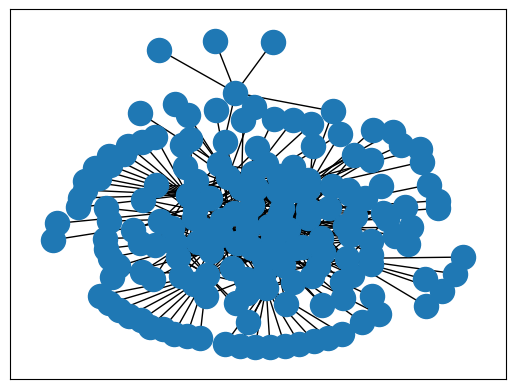

In [126]:
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos, with_labels=False)

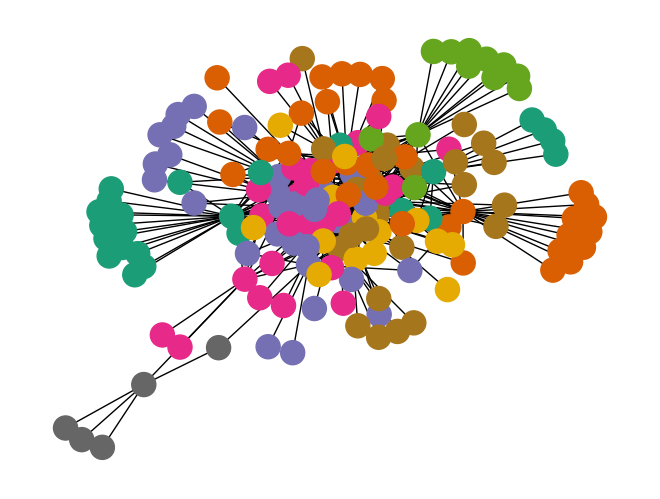

In [140]:
import seaborn as sns
part=community_louvain.best_partition(G)

palette = sns.color_palette("Dark2", max(part.values())+1)

#colors=['blue', 'red','green', 'yellow']
color_map = []

for node in G:
    color_index=part[node]
    color_map.append(palette[color_index])
    
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

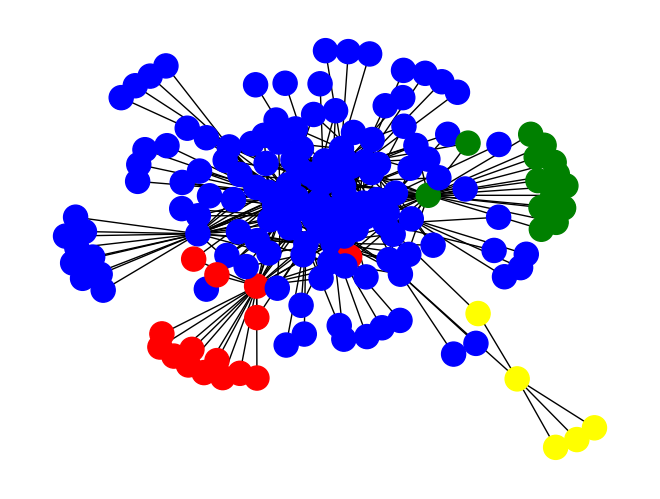

In [143]:
k=4
comp =list( nx.algorithms.community.girvan_newman(G))[k-2]
colors=['blue', 'red','green', 'yellow']
color_map = []

for node in G:
    if node in comp[0]:
        color_map.append(colors[k-4])
    
    elif node in comp[1]: 
        color_map.append(colors[k-3])
   
    elif node in comp[2]: 
        color_map.append(colors[k-2])
    
    else:
        color_map.append(colors[k-1])

nx.draw(G, node_color=color_map, with_labels=False)
plt.show()